## MODELOS DE SERIES DE TIEMPO (ARIMA y SARIMA) PARA PRONÓSTICO DE DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 
## UNAM
## Alumno: Ibarra Ramírez Sergio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Se lee la data "original" de Demanda en sector eléctrico 

In [3]:
demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


Se grafica la data "original" de Demanda en sector eléctrico 

Text(0, 0.5, 'Demanda [MMpcd]')

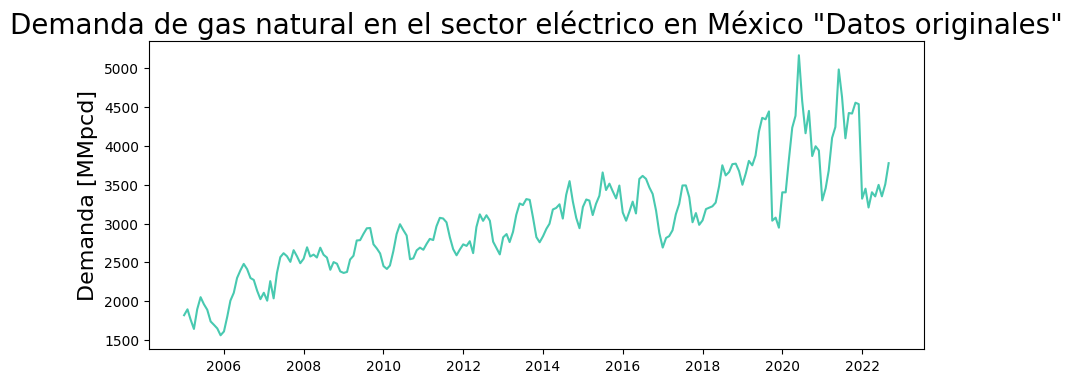

In [4]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se descompone la data "original" de Demanda en sector eléctrico  en sus compoentes de Tendencia, Estacionalidad y Residual

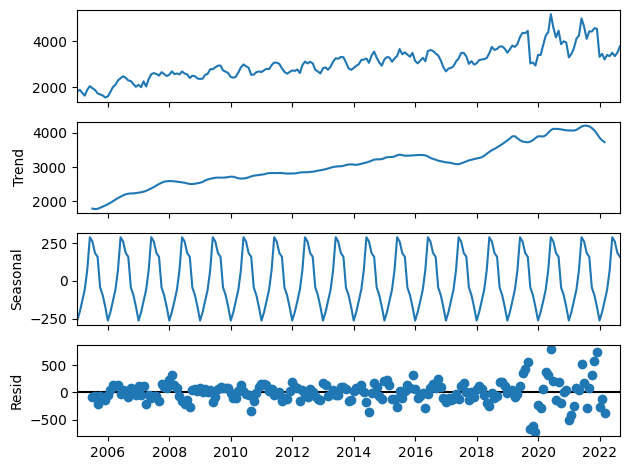

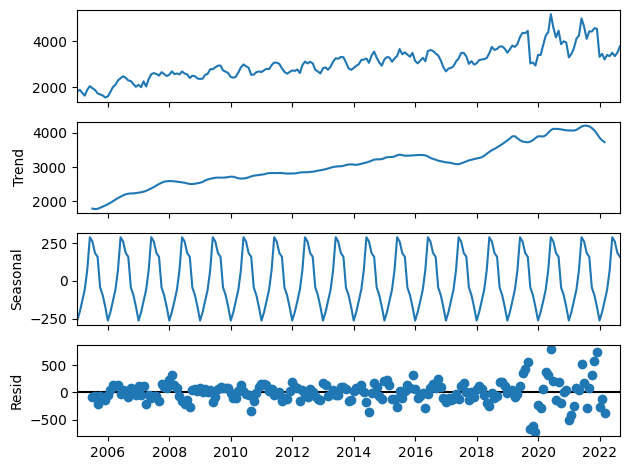

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

demanda_electrico_original_seasonal_decomposition = seasonal_decompose(demanda_electrico_original, period=12)
demanda_electrico_original_seasonal_decomposition.plot()

Se lleva a cabo la prueba de estacionariedad de Dickey-Fulley a la data "original" de Demanda en sector eléctrico

En la prueba DF H0 que establece que la serie NO es estacionaria. Es decir que el valor de la Unit Root p=1 y por lo tanto la serie es una especie de ruido blanco. Ha: Establece qe p<1 y por lo tanto la serie tiene un componente determinístico que la hace tender hacia un valor medio

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_electrico_original_sin_diferenciar = adfuller(demanda_electrico_original)


adf_test_electrico_original_sin_diferenciar

(-1.9362234591018268,
 0.3152169397511448,
 15,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 2667.963876967698)

In [7]:
print(f"The ADF statistic value f is: {adf_test_electrico_original_sin_diferenciar[0]}")

print(f"The ADF p value p is: {adf_test_electrico_original_sin_diferenciar[1]}")

if adf_test_electrico_original_sin_diferenciar[0] < adf_test_electrico_original_sin_diferenciar[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -1.9362234591018268
The ADF p value p is: 0.3152169397511448
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


Se elaboran las gráficas de ACF y PACF de la data "original" de Demanda en sector eléctrico

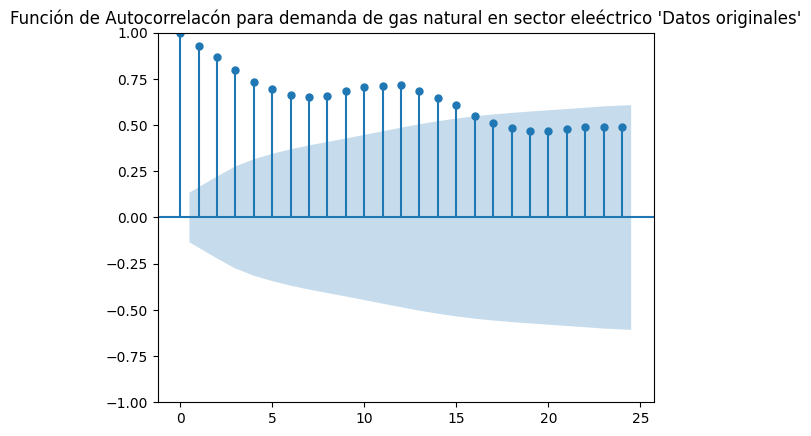

In [8]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

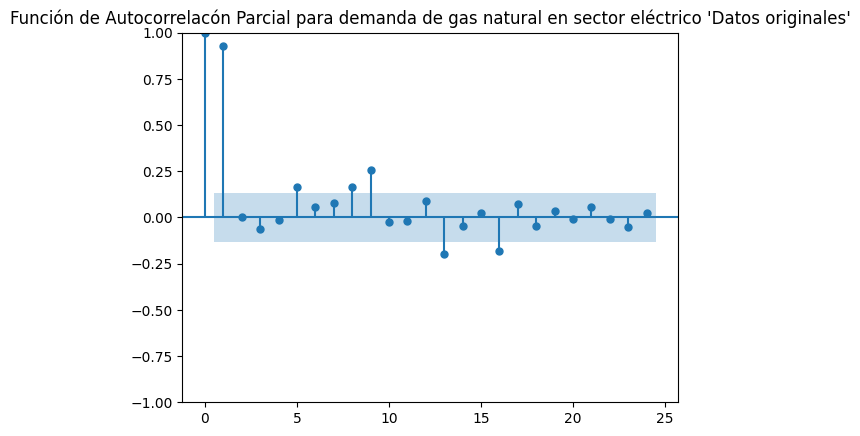

In [9]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eléctrico 'Datos originales'")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie de data "original" de Demanda en sector eléctrico para lograr estacionariedad 

In [10]:
demanda_electrico_original_diff1 = demanda_electrico_original.diff()
demanda_electrico_original_diff1

,Demanded_Gas
Date,
2005-01-01,NaN
2005-02-01,75.75
2005-03-01,-129.47
2005-04-01,-123.16
2005-05-01,252.84
...,...
2022-05-01,-53.41
2022-06-01,148.67
2022-07-01,-147.73


Se grafica la diferencia de la la serie de data "original" de Demanda en sector eléctrico

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

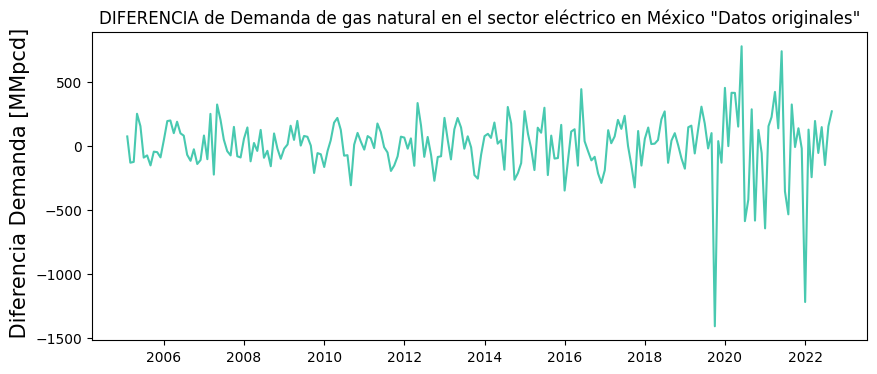

In [11]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México "Datos originales"')
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se lleva a cabo la prueba de estacionariedad de Dickey-Fulley a la DIFERENCIA1 Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Check for infinite or NaN values
demanda_electrico_original_diff1.dropna(inplace=True)

# Perform ADF test
adf_test_electrico_original_diferencia1 = adfuller(demanda_electrico_original_diff1)


adf_test_electrico_original_diferencia1

(-4.063276407512049,
 0.001113114789436486,
 15,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 2657.205881461088)

In [13]:
print(f"The ADF statistic value f is: {adf_test_electrico_original_diferencia1[0]}")

print(f"The ADF p value p is: {adf_test_electrico_original_diferencia1[1]}")

if adf_test_electrico_original_diferencia1[0] < adf_test_electrico_original_diferencia1[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -4.063276407512049
The ADF p value p is: 0.001113114789436486
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

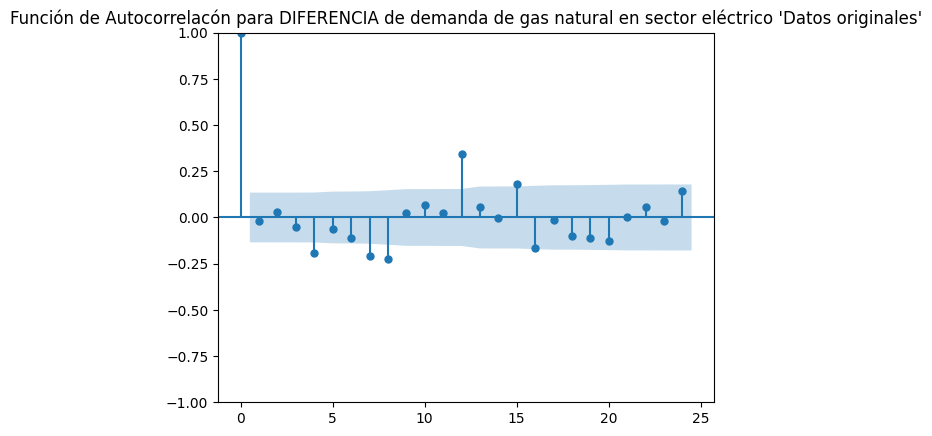

In [14]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para DIFERENCIA de demanda de gas natural en sector eléctrico 'Datos originales'")

# Show the plot
plt.show()

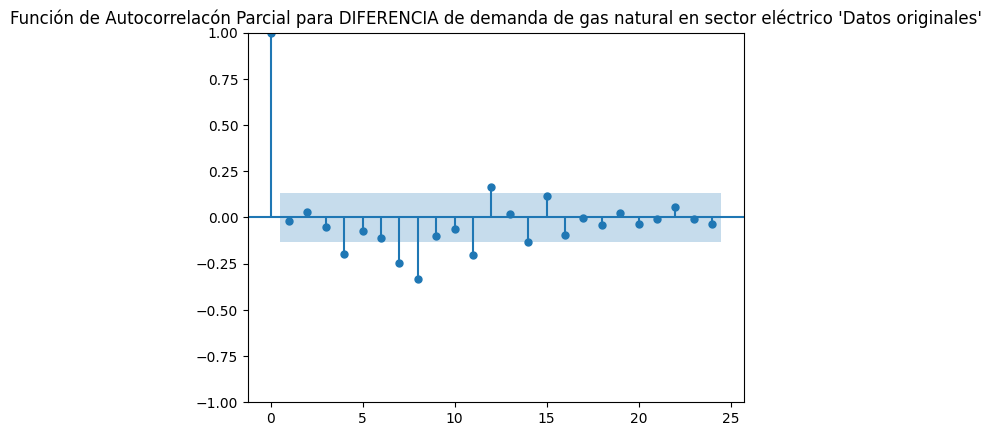

In [15]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para DIFERENCIA de demanda de gas natural en sector eléctrico 'Datos originales'")

# Show the plot
plt.show()

Separamos la data original de Demanda de gas natural en el sector eléctrico en data de train y test

In [16]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_original_train_data = demanda_electrico_original[:-num_test_points]
demanda_electrico_original_test_data = demanda_electrico_original[-num_test_points:]

demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Se grafica la distribución de la data "original" de Demanda en sector eléctrico

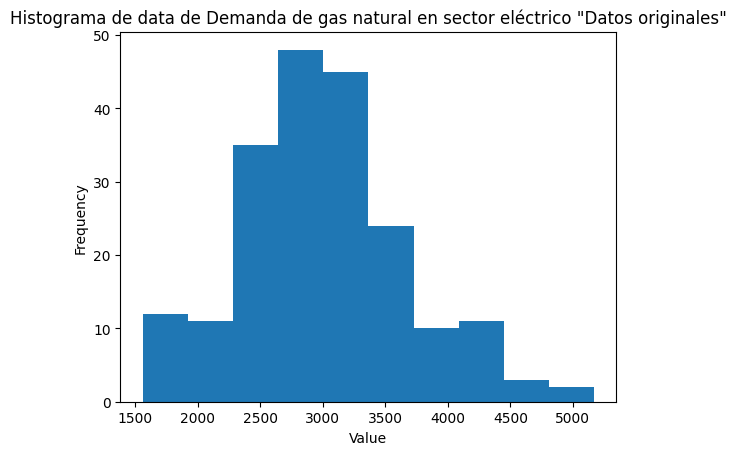

In [17]:
# Generate the histogram
plt.hist(demanda_electrico_original_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

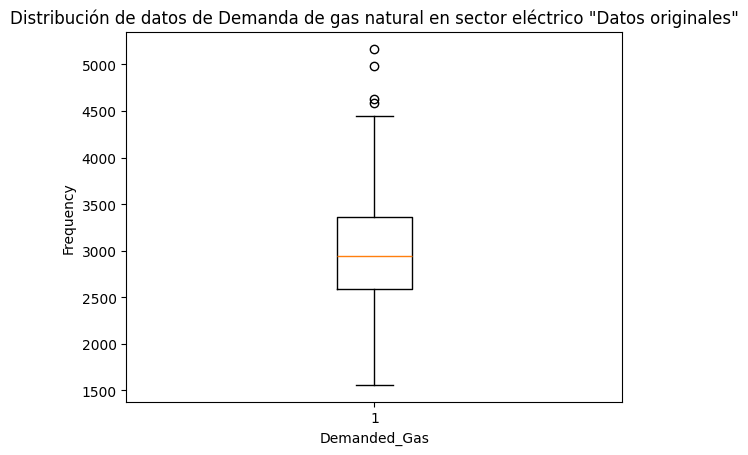

In [18]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_original_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

### Se intenta un modelo Moving Average para el caso de la data original de Demanda en el sector eléctrico

Text(0, 0.5, 'Demanda [MMpcd]')

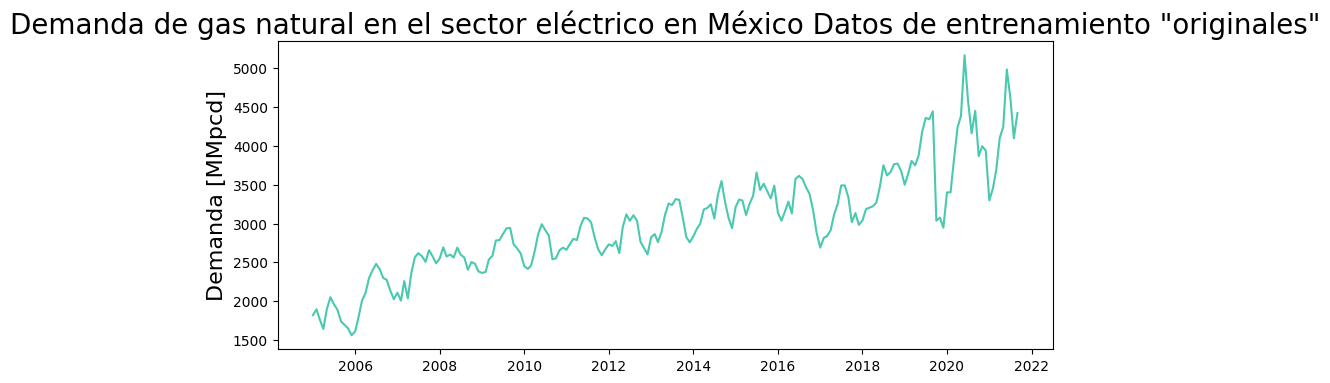

In [19]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original_train_data, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México Datos de entrenamiento "originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

In [20]:
demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [21]:
electrico_series_train = demanda_electrico_original_train_data["Demanded_Gas"]
electrico_series_train

Date
2005-01-01    1819.58
2005-02-01    1895.33
2005-03-01    1765.86
2005-04-01    1642.70
2005-05-01    1895.54
               ...   
2021-05-01    4243.93
2021-06-01    4985.53
2021-07-01    4631.85
2021-08-01    4098.81
2021-09-01    4424.39
Name: Demanded_Gas, Length: 201, dtype: float64

In [22]:
# Apply rolling window mean with window size 6
moving_average_electrico_series_train = electrico_series_train.rolling(window=6).mean()
moving_average_electrico_series_train

Date
2005-01-01            NaN
2005-02-01            NaN
2005-03-01            NaN
2005-04-01            NaN
2005-05-01            NaN
                 ...     
2021-05-01    3787.301667
2021-06-01    3961.370000
2021-07-01    4183.606667
2021-08-01    4291.040000
2021-09-01    4414.888333
Name: Demanded_Gas, Length: 201, dtype: float64

Text(0, 0.5, 'Demanda [MMpcd]')

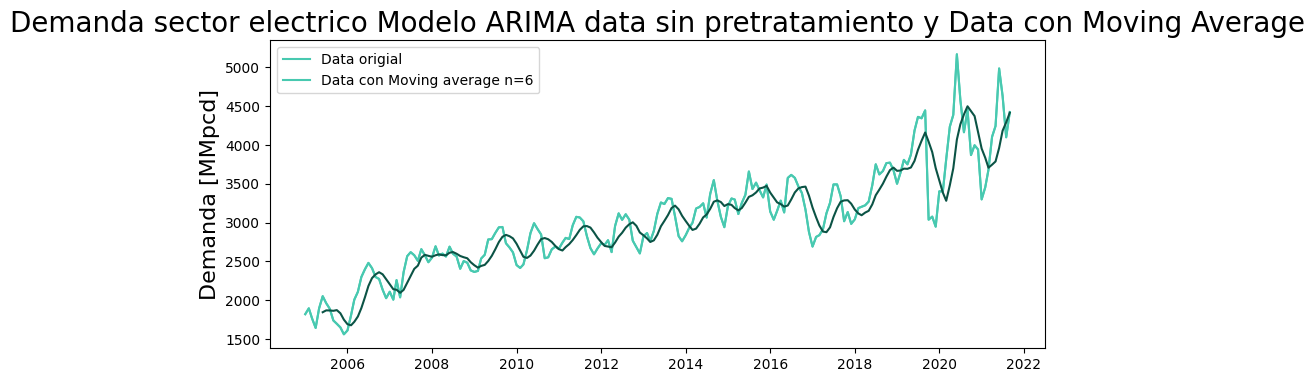

In [23]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original_train_data, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México Datos de entrenamiento "originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

plt.plot(demanda_electrico_original_train_data['Demanded_Gas'], color='#48C9B0')
plt.plot(moving_average_electrico_series_train, color='#0B5345')
plt.legend(('Data origial', 'Data con Moving average n=6'), fontsize=10)

plt.title('Demanda sector electrico Modelo ARIMA data sin pretratamiento y Data con Moving Average', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [24]:
shift_moving_average_electrico_series_train = moving_average_electrico_series_train.iloc[-12:]
shift_moving_average_electrico_series_train

Date
2020-10-01    4437.220000
2020-11-01    4371.925000
2020-12-01    4167.400000
2021-01-01    3953.473333
2021-02-01    3835.213333
2021-03-01    3706.828333
2021-04-01    3746.003333
2021-05-01    3787.301667
2021-06-01    3961.370000
2021-07-01    4183.606667
2021-08-01    4291.040000
2021-09-01    4414.888333
Name: Demanded_Gas, dtype: float64

In [25]:
# Apply rolling window mean with window size 6
rolling_shift_moving_average_electrico_series_train = shift_moving_average_electrico_series_train.rolling(window=6).mean()
rolling_shift_moving_average_electrico_series_train

Date
2020-10-01            NaN
2020-11-01            NaN
2020-12-01            NaN
2021-01-01            NaN
2021-02-01            NaN
2021-03-01    4078.676667
2021-04-01    3963.473889
2021-05-01    3866.036667
2021-06-01    3831.698333
2021-07-01    3870.053889
2021-08-01    3946.025000
2021-09-01    4064.035000
Name: Demanded_Gas, dtype: float64

In [26]:
# Calculate the moving average with window size n (no trailing values)
n = 12  # Adjust n as needed
def custom_moving_average(series, window):
  # Create an empty Series to store forecasts
  forecast_series = pd.Series(index=series.index)
  for i in range(window):
    forecast_series.iloc[i] = series.iloc[i-window:i].mean()  # Use only previous n values
  return forecast_series

custom_moving_average_electrico_series_train = custom_moving_average(shift_moving_average_electrico_series_train, n)

custom_moving_average_electrico_series_train

Date
2020-10-01   NaN
2020-11-01   NaN
2020-12-01   NaN
2021-01-01   NaN
2021-02-01   NaN
2021-03-01   NaN
2021-04-01   NaN
2021-05-01   NaN
2021-06-01   NaN
2021-07-01   NaN
2021-08-01   NaN
2021-09-01   NaN
dtype: float64

### Se define y entrena modelo ARIMA para el caso de la data original de Demanda en el sector eléctrico

In [27]:

##Create the model
model_ARIMA_electrico_original = ARIMA (demanda_electrico_original_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_original_fit = model_ARIMA_electrico_original.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_original_fit.summary())


c:\Users\sergi\OneDrive\Documentos\MIS_UNAM\MIS_Tesis_Full_follow_HP-I3\MIS_Tesis_GitHub\MIS_Tesis_Venv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sergi\OneDrive\Documentos\MIS_UNAM\MIS_Tesis_Full_follow_HP-I3\MIS_Tesis_GitHub\MIS_Tesis_Venv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sergi\OneDrive\Documentos\MIS_UNAM\MIS_Tesis_Full_follow_HP-I3\MIS_Tesis_GitHub\MIS_Tesis_Venv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 4.534896373748779
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1333.396
Date:                Wed, 10 Apr 2024   AIC                           2684.793
Time:                        16:56:53   BIC                           2714.478
Sample:                    01-01-2005   HQIC                          2696.806
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8308      0.074     11.202      0.000       0.685       0.976
ar.L2         -0.4252      0.068     -6.294      0.000      -0.558      -0.293
ar.L3          

c:\Users\sergi\OneDrive\Documentos\MIS_UNAM\MIS_Tesis_Full_follow_HP-I3\MIS_Tesis_GitHub\MIS_Tesis_Venv1\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [28]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico_original = model_ARIMA_electrico_original_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_original)

2021-10-01    4116.919792
2021-11-01    3938.661142
2021-12-01    4075.783781
2022-01-01    3892.115780
2022-02-01    3786.677023
2022-03-01    4047.242794
2022-04-01    4032.864798
2022-05-01    3974.030171
2022-06-01    4246.932479
2022-07-01    4265.558507
2022-08-01    4126.053842
2022-09-01    4289.164033
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

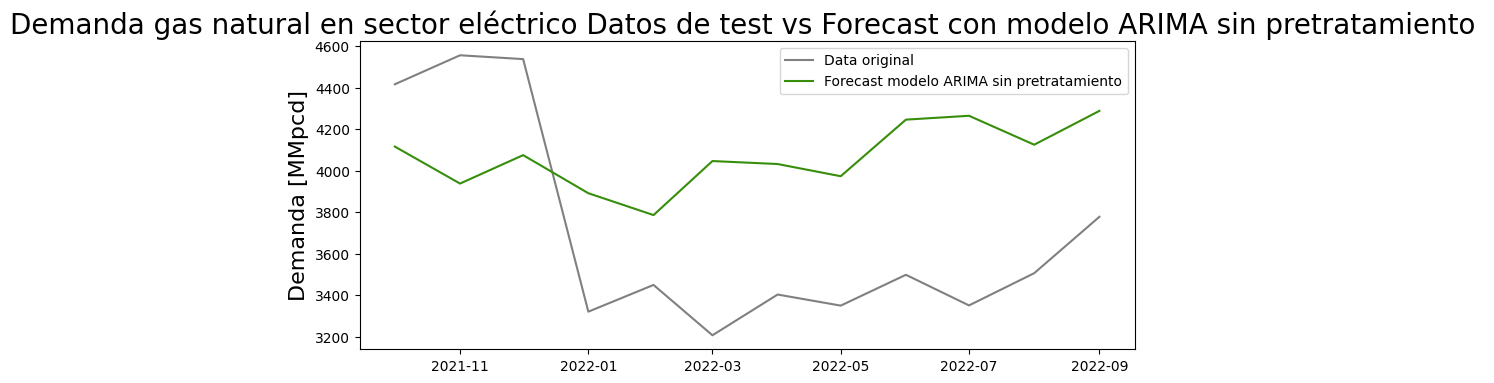

In [29]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data, color='gray')
plt.plot(predictions_model_ARIMA_electrico_original, color='#368E0B')
plt.legend(('Data original', 'Forecast modelo ARIMA sin pretratamiento'), fontsize=10)

plt.title('Demanda gas natural en sector eléctrico Datos de test vs Forecast con modelo ARIMA sin pretratamiento ', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Cuantificando el error de las predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [30]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_original = mean_absolute_percentage_error(demanda_electrico_original_test_data, predictions_model_ARIMA_electrico_original)
RMSE_predictions_model_ARIMA_electrico_original = np.sqrt(mean_squared_error(demanda_electrico_original_test_data, predictions_model_ARIMA_electrico_original))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_original)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_original)

MAPE: 0.16728862827534655
RMSE: 623.1882200265067


### Proceso de Pretratamiento (Ajuste de valores atípicos por media aritmetica y/o mediana de serie)  como una estrategia para mejorar los resultados de forecast de modelos ARIMA 

### Proceso de Pretratamiento Ajuste de valores atípicos por media aritmetica

In [31]:
outlier_threshold = 1.25

import pandas as pd

def remove_replace_outliers_media(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data

Se genera una copia del demanda_electrico_original para conservar los datos originales en un array y éstos no se vean afectados por el tratamiento de valores atípicos

In [32]:
# Create a copy of the original DataFrame
demanda_electrico_original_train_data_para_tratamiento = demanda_electrico_original_train_data.copy()
demanda_electrico_original_train_data_para_tratamiento

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [33]:
demanda_electrico_train_pretratamiento_media = remove_replace_outliers_media(demanda_electrico_original_train_data_para_tratamiento['Demanded_Gas'])
demanda_electrico_train_pretratamiento_media

Date
2005-01-01    1819.580000
2005-02-01    1895.330000
2005-03-01    1765.860000
2005-04-01    1642.700000
2005-05-01    1895.540000
                 ...     
2021-05-01    4243.930000
2021-06-01    2930.477354
2021-07-01    2930.477354
2021-08-01    4098.810000
2021-09-01    2930.477354
Name: Demanded_Gas, Length: 201, dtype: float64

Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers_media)


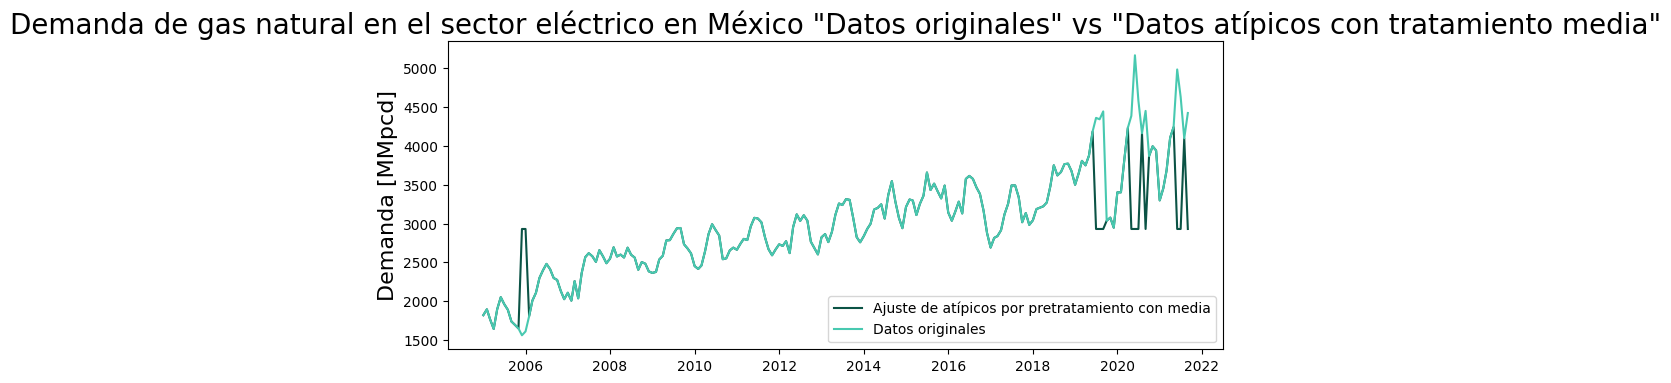

In [34]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_train_pretratamiento_media, color='#0B5345')
plt.plot(demanda_electrico_original_train_data, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales" vs "Datos atípicos con tratamiento media"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
# Add a legend to the left bottom corner
plt.legend(['Ajuste de atípicos por pretratamiento con media', 'Datos originales'], loc='lower right', fontsize=10)


Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos atípicos con tratamiento media"

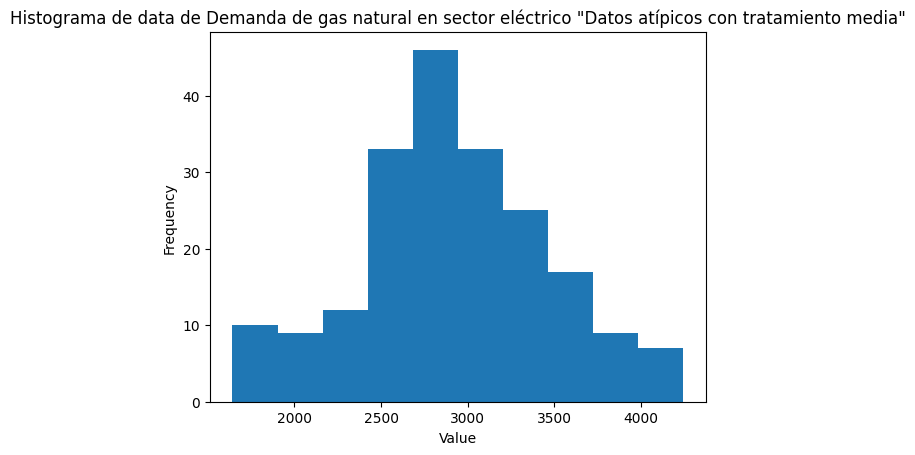

In [35]:
# Generate the histogram
plt.hist(demanda_electrico_train_pretratamiento_media, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento media"')

# Display the plot
plt.show()

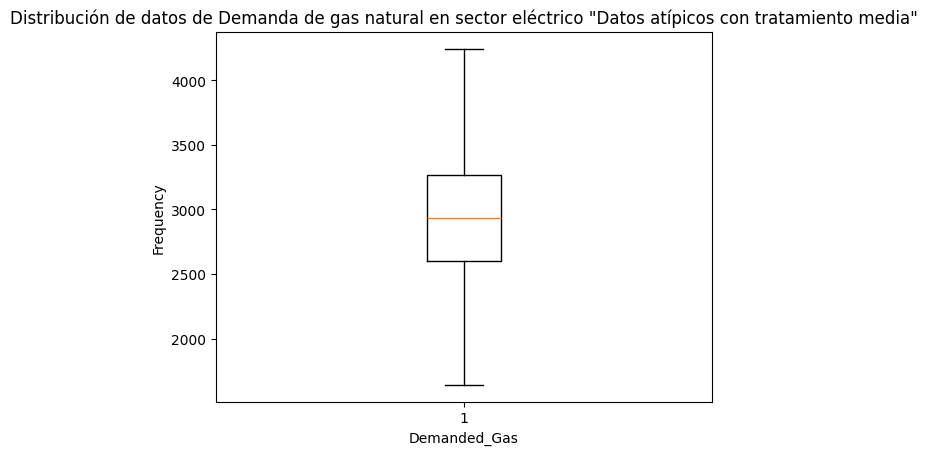

In [36]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_train_pretratamiento_media)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento media"')

# Display the plot
plt.show()

Se muestran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos atípicos con tratamiento media"

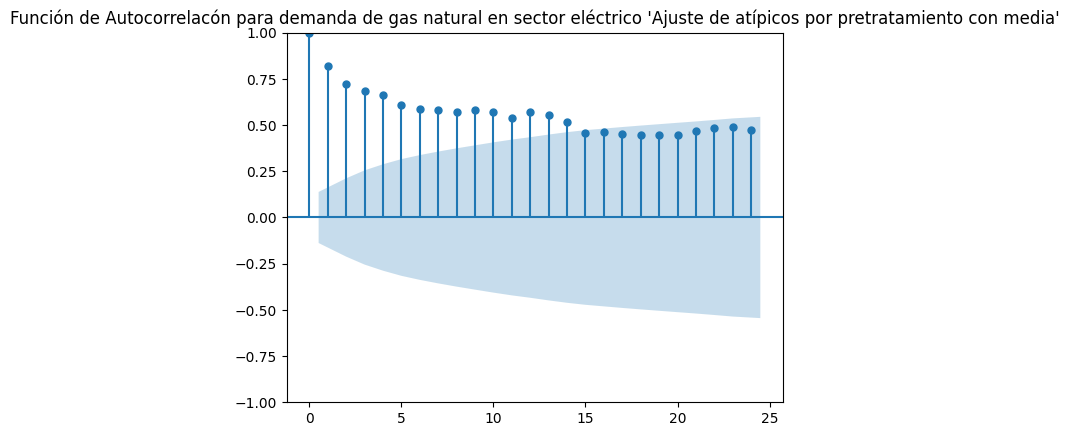

In [37]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_train_pretratamiento_media.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eléctrico 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

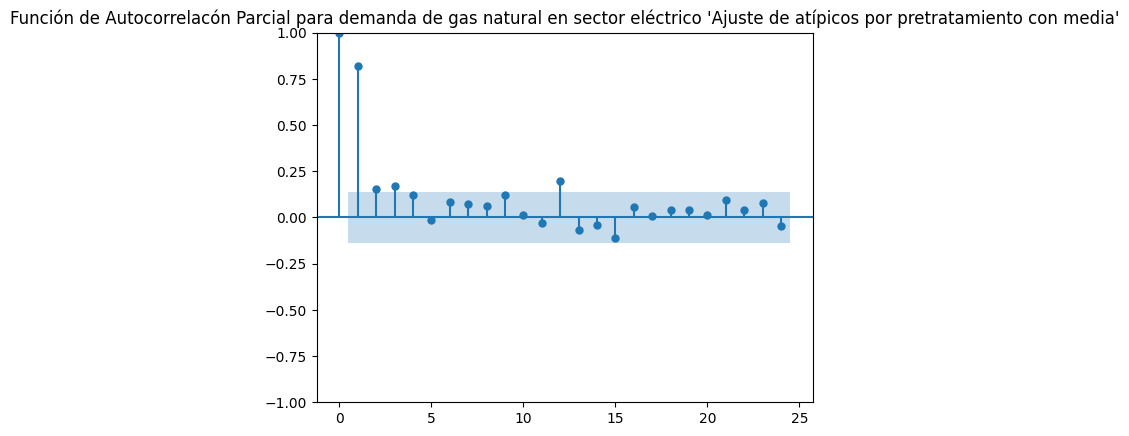

In [38]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_train_pretratamiento_media.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eléctrico 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data datos atípicos con tratamiento media 

In [39]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_train_pretratamiento_media = adfuller(demanda_electrico_train_pretratamiento_media)


adf_test_demanda_electrico_train_pretratamiento_media

(-1.852397319724662,
 0.35477530753700975,
 15,
 185,
 {'1%': -3.4662005731940853,
  '5%': -2.8772932777920364,
  '10%': -2.575167750182615},
 2589.6110441033215)

In [40]:

print(f"The ADF statistic value f is: {adf_test_demanda_electrico_train_pretratamiento_media[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_train_pretratamiento_media[1]}")

if adf_test_demanda_electrico_train_pretratamiento_media[0] < adf_test_demanda_electrico_train_pretratamiento_media[4]['5%']:
      print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -1.852397319724662
The ADF p value p is: 0.35477530753700975
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


También para este caso  se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México


In [41]:
demanda_electrico_train_tratamiento_media_diff1 = demanda_electrico_train_pretratamiento_media.diff()
demanda_electrico_train_tratamiento_media_diff1

Date
2005-01-01            NaN
2005-02-01      75.750000
2005-03-01    -129.470000
2005-04-01    -123.160000
2005-05-01     252.840000
                 ...     
2021-05-01     139.110000
2021-06-01   -1313.452646
2021-07-01       0.000000
2021-08-01    1168.332646
2021-09-01   -1168.332646
Name: Demanded_Gas, Length: 201, dtype: float64

Histograma de data de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento media" DIFERENCIA 1

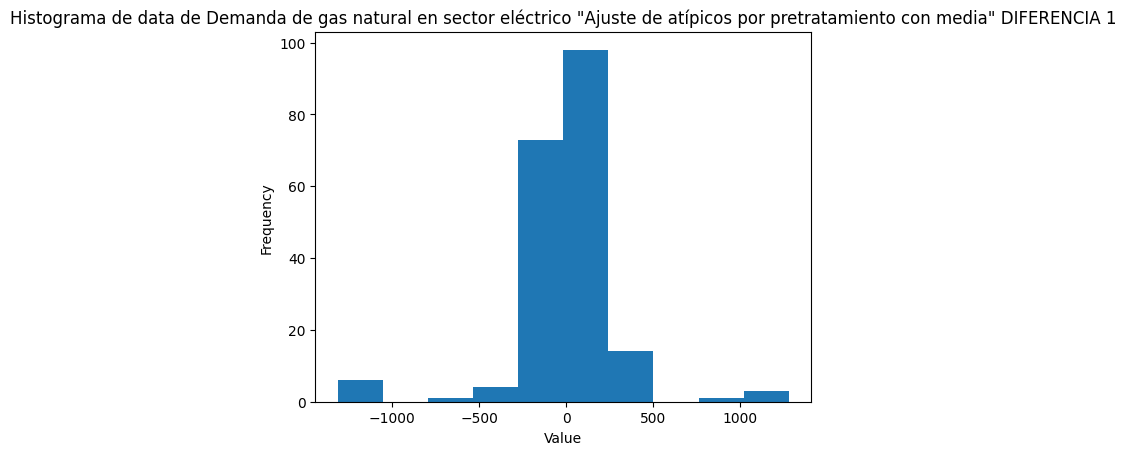

In [42]:
# Generate the histogram
plt.hist(demanda_electrico_train_tratamiento_media_diff1.dropna(), bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Ajuste de atípicos por pretratamiento con media" DIFERENCIA 1')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data con pretratamiento de media Diferencia 1

In [43]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_train_tratamiento_media_diff1 = adfuller(demanda_electrico_train_tratamiento_media_diff1.dropna())


adf_test_demanda_electrico_train_tratamiento_media_diff1

(-5.02197824777801,
 2.0074484545709655e-05,
 14,
 185,
 {'1%': -3.4662005731940853,
  '5%': -2.8772932777920364,
  '10%': -2.575167750182615},
 2577.445462760655)

In [44]:
print(f"The ADF statistic value f is: {adf_test_demanda_electrico_train_tratamiento_media_diff1[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_train_tratamiento_media_diff1[1]}")

if adf_test_demanda_electrico_train_tratamiento_media_diff1[0] < adf_test_demanda_electrico_train_tratamiento_media_diff1[4]['5%']:
     print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")

The ADF statistic value f is: -5.02197824777801
The ADF p value p is: 2.0074484545709655e-05
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


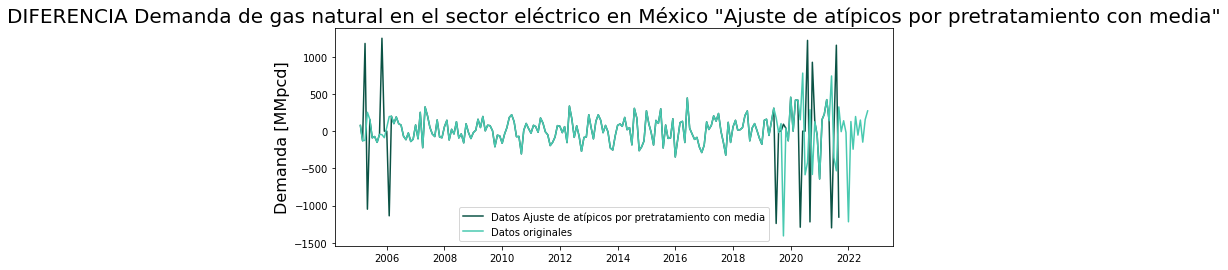

In [36]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_train_tratamiento_media_diff1, color='#0B5345')
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA Demanda de gas natural en el sector eléctrico en México "Ajuste de atípicos por pretratamiento con media"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
plt.legend(['Datos Ajuste de atípicos por pretratamiento con media', 'Datos originales'], loc='lower center', fontsize=10)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento media"

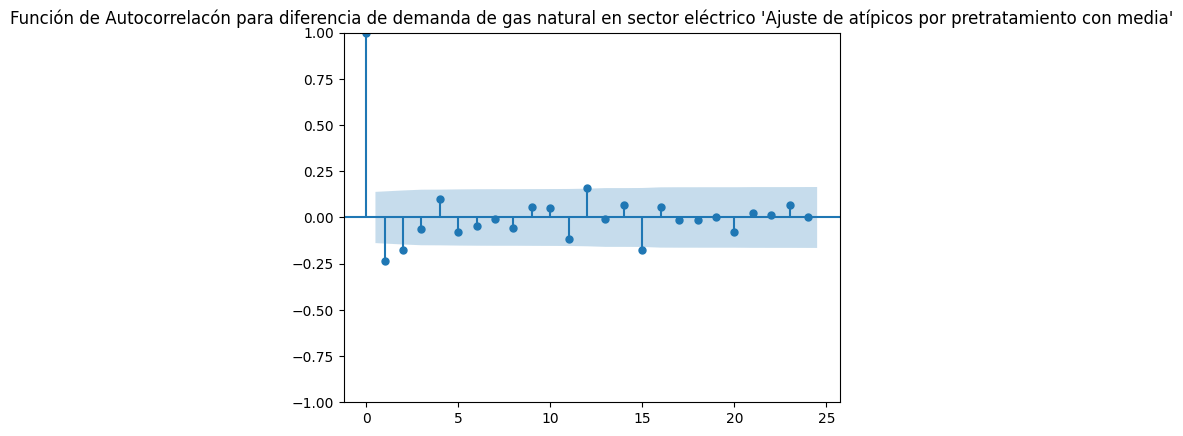

In [45]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_train_tratamiento_media_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector eléctrico 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

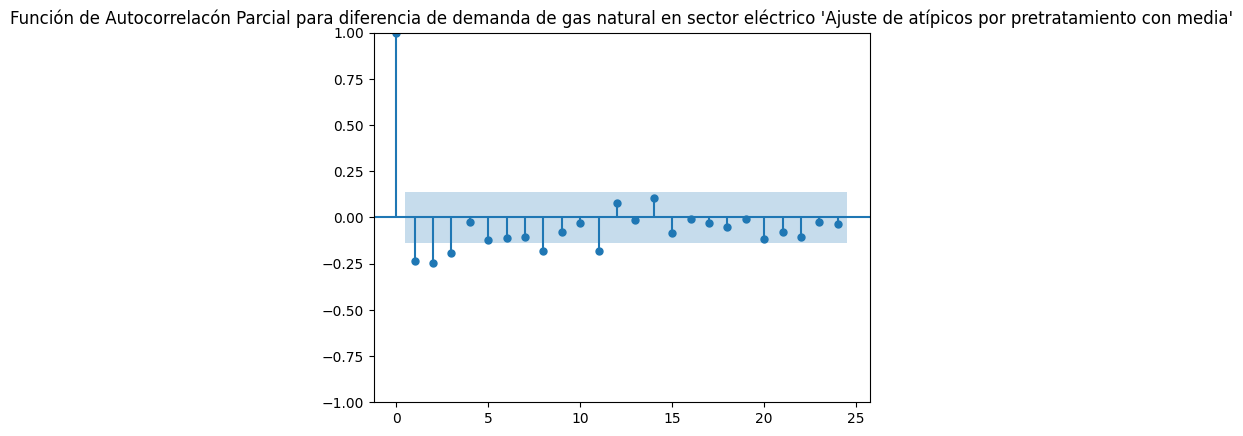

In [46]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_train_tratamiento_media_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector eléctrico 'Ajuste de atípicos por pretratamiento con media'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento media'

In [47]:
##Create the model
model_ARIMA_electrico_tratamiento_media = ARIMA (demanda_electrico_train_pretratamiento_media, order=(3,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento_media_fit = model_ARIMA_electrico_tratamiento_media.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento_media_fit.summary())


c:\Users\sergi\OneDrive\Documentos\MIS_UNAM\MIS_Tesis_Full_follow_HP-I3\MIS_Tesis_GitHub\MIS_Tesis_Venv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sergi\OneDrive\Documentos\MIS_UNAM\MIS_Tesis_Full_follow_HP-I3\MIS_Tesis_GitHub\MIS_Tesis_Venv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sergi\OneDrive\Documentos\MIS_UNAM\MIS_Tesis_Full_follow_HP-I3\MIS_Tesis_GitHub\MIS_Tesis_Venv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 2.0389652252197266
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1407.446
Date:                Wed, 10 Apr 2024   AIC                           2828.893
Time:                        17:00:18   BIC                           2851.981
Sample:                    01-01-2005   HQIC                          2838.236
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7248      0.114     -6.365      0.000      -0.948      -0.502
ar.L2         -0.4120      0.092     -4.464      0.000      -0.593      -0.231
ar.L3         

In [48]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]


In [49]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento_media = model_ARIMA_electrico_tratamiento_media_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento_media)

2021-10-01    3014.293283
2021-11-01    3358.948652
2021-12-01    3525.310372
2022-01-01    3284.654503
2022-02-01    3480.697233
2022-03-01    3481.251601
2022-04-01    3337.143140
2022-05-01    3492.644489
2022-06-01    3439.444342
2022-07-01    3376.252915
2022-08-01    3484.644261
2022-09-01    3418.196609
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

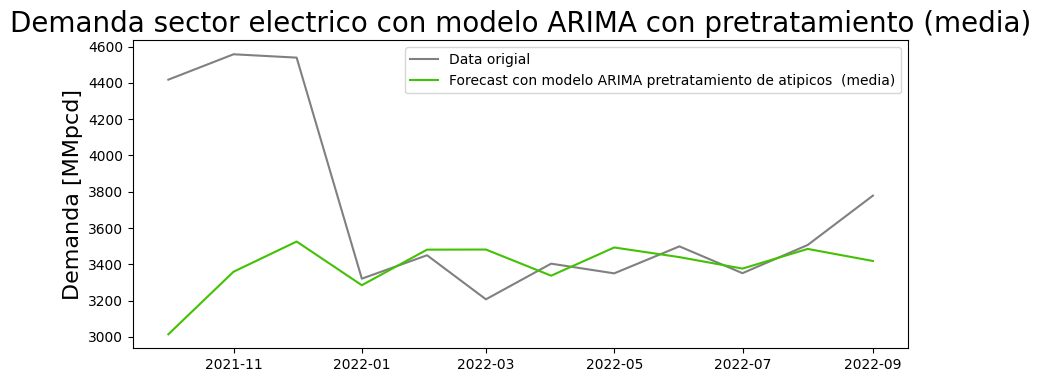

In [52]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_electrico_tratamiento_media,color='#43C104')

plt.legend(('Data origial', 'Forecast con modelo ARIMA pretratamiento de atipicos  (media)'), fontsize=10)


plt.title('Demanda sector electrico con modelo ARIMA con pretratamiento (media)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento_media

In [53]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento_media = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento_media)
RMSE_predictions_model_ARIMA_electrico_tratamiento_media = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento_media))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento_media)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento_media)

MAPE: 0.09144531743328203
RMSE: 623.7739750209349


Text(0, 0.5, 'Demanda [MMpcd]')

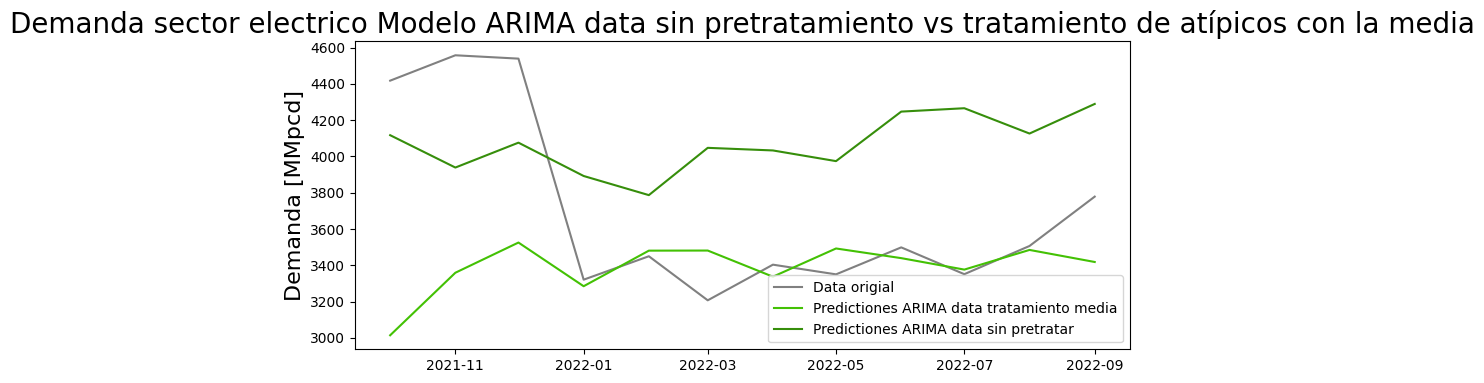

In [54]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='gray')
plt.plot(predictions_model_ARIMA_electrico_tratamiento_media, color='#43C104')
plt.plot(predictions_model_ARIMA_electrico_original, color='#368E0B')
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento media', 'Predictiones ARIMA data sin pretratar'), fontsize=10)

plt.title('Demanda sector electrico Modelo ARIMA data sin pretratamiento vs tratamiento de atípicos con la media', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

### Vamos a entrenar un segundo modelo SARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento media' 

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create the SARIMA model
model_SARIMA_electrico_tratamiento_media = SARIMAX(demanda_electrico_train_pretratamiento_media, order=(3, 1, 1), seasonal_order=(0, 1, 0, 12))

# Fit the SARIMA model
model_SARIMA_electrico_tratamiento_media_fit = model_SARIMA_electrico_tratamiento_media.fit()

# Print the summary of the model
print(model_SARIMA_electrico_tratamiento_media_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                        Demanded_Gas   No. Observations:                  201
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1360.903
Date:                             Wed, 04 Oct 2023   AIC                           2731.806
Time:                                     12:12:29   BIC                           2747.988
Sample:                                 01-01-2005   HQIC                          2738.362
                                      - 09-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4934      0.048     10.248      0.000       0.399       0.588
ar.L2          0.0440      

Se obtiene el forecast del model SARIMA electrico tratamiento media

In [51]:
##get the predictors and residuals 
predictions_model_SARIMA_electrico_tratamiento_media = model_SARIMA_electrico_tratamiento_media_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_SARIMA_electrico_tratamiento_media)

2021-10-01    3920.013325
2021-11-01    4077.759914
2021-12-01    4036.702363
2022-01-01    3399.397399
2022-02-01    3556.647381
2022-03-01    3783.898023
2022-04-01    4207.252812
2022-05-01    4346.203977
2022-06-01    3046.396069
2022-07-01    3046.351763
2022-08-01    4200.927895
2022-09-01    3046.329997
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

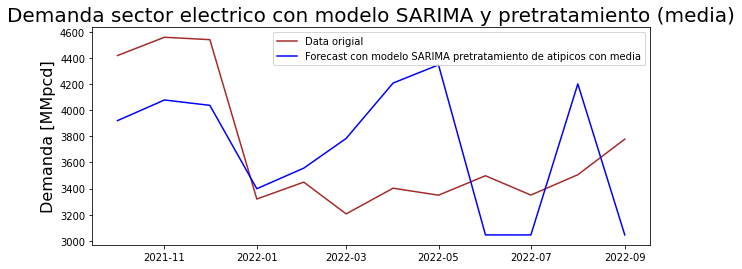

In [56]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_SARIMA_electrico_tratamiento_media, color='blue')

plt.legend(('Data origial', 'Forecast con modelo SARIMA pretratamiento de atipicos con media'))


plt.title('Demanda sector electrico con modelo SARIMA y pretratamiento (media)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_SARIMA_electrico_tratamiento_media

In [53]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_SARIMA_electrico_tratamiento_media = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_SARIMA_electrico_tratamiento_media)
RMSE_predictions_model_SARIMA_electrico_tratamiento_media = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_SARIMA_electrico_tratamiento_media))

print('MAPE:', MAPE_predictions_model_SARIMA_electrico_tratamiento_media)
print('RMSE:', RMSE_predictions_model_SARIMA_electrico_tratamiento_media)

MAPE: 0.14238234601319957
RMSE: 579.8163066140048


Text(0, 0.5, 'Demanda [MMpcd]')

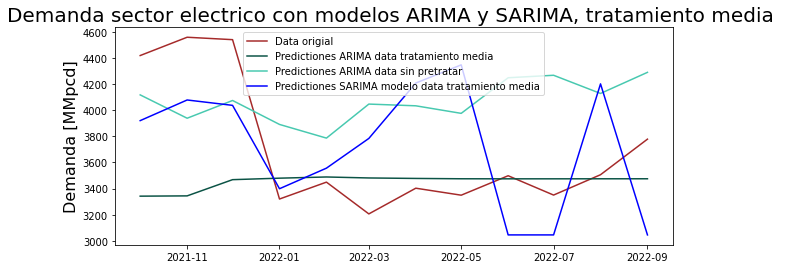

In [ ]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_ARIMA_electrico_tratamiento_media, color='#0B5345')
plt.plot(predictions_model_ARIMA_electrico_original, color='#48C9B0')
plt.plot(predictions_model_SARIMA_electrico_tratamiento_media, color='blue')
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento media', 'Predictiones ARIMA data sin pretratar', 'Predictiones SARIMA modelo data tratamiento media'), fontsize=10)

plt.title('Demanda sector electrico con modelos ARIMA y SARIMA, tratamiento media ', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

### Proceso de Pretratamiento Ajuste de valores atípicos por mediana

In [59]:
import numpy as np
import tensorflow as tf

# Set a seed for numpy random number generation
np.random.seed(0)

# Set a seed for TensorFlow random number generation
tf.random.set_seed(0)

In [60]:
outlier_threshold = 1.2

import pandas as pd

def remove_replace_outliers_mediana(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical meadian excluding outliers
    historical_median = np.median(data[~outliers_mask])

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_median

    return data

Se genera nuevamente una copia del demanda_electrico_original para conservar los datos originales en un array y éstos no se vean afectados por el tratamiento de valores atípicos

In [62]:
# Create a copy of the original DataFrame
demanda_electrico_original_train_data_para_tratamiento2 = demanda_electrico_original_train_data.copy()
demanda_electrico_original_train_data_para_tratamiento2

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [63]:
demanda_electrico_train_pretratamiento_mediana = remove_replace_outliers_mediana(demanda_electrico_original_train_data_para_tratamiento2['Demanded_Gas'])
demanda_electrico_train_pretratamiento_mediana

Date
2005-01-01    1819.58
2005-02-01    1895.33
2005-03-01    1765.86
2005-04-01    2939.05
2005-05-01    1895.54
               ...   
2021-05-01    4243.93
2021-06-01    2939.05
2021-07-01    2939.05
2021-08-01    4098.81
2021-09-01    2939.05
Name: Demanded_Gas, Length: 201, dtype: float64

Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers_mediana)

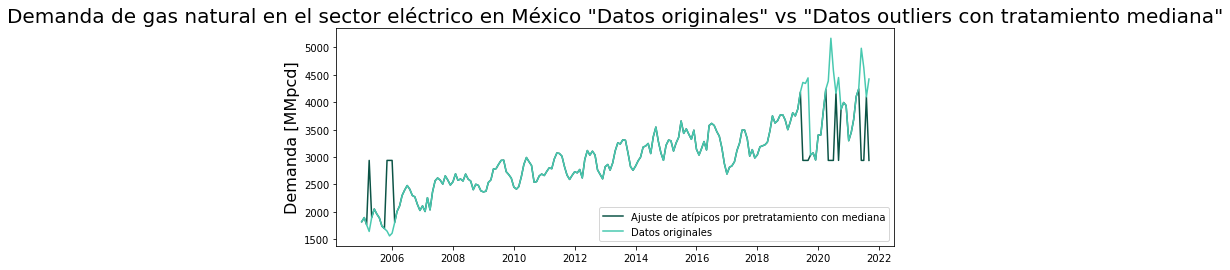

In [64]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_train_pretratamiento_mediana, color='#0B5345')
plt.plot(demanda_electrico_original_train_data, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales" vs "Datos outliers con tratamiento mediana"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
# Add a legend to the left bottom corner
plt.legend(['Ajuste de atípicos por pretratamiento con mediana', 'Datos originales'], loc='lower right', fontsize=10)

Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos atípicos con tratamiento median"


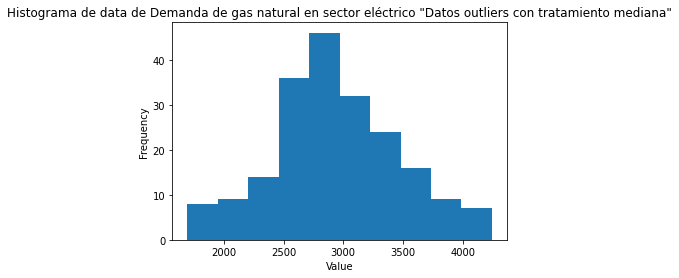

In [65]:
# Generate the histogram
plt.hist(demanda_electrico_train_pretratamiento_mediana, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento mediana"')

# Display the plot
plt.show()

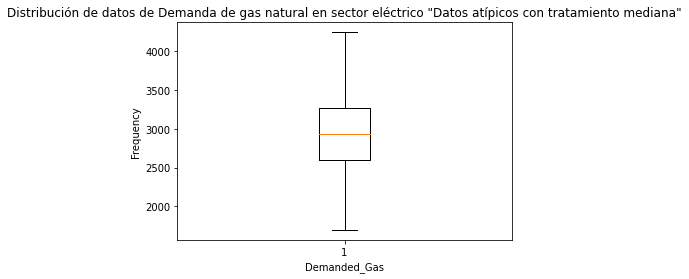

In [66]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_train_pretratamiento_mediana)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento mediana"')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data datos atípicos con tratamiento mediana

In [67]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_train_pretratamiento_mediana = adfuller(demanda_electrico_train_pretratamiento_mediana)


adf_test_demanda_electrico_train_pretratamiento_mediana

(-1.1748317293632136,
 0.6843276991136108,
 11,
 189,
 {'1%': -3.4654311561944873,
  '5%': -2.8769570530458792,
  '10%': -2.574988319755886},
 2588.1291056060063)

In [68]:
print(f"The ADF statistic value f is: {adf_test_demanda_electrico_train_pretratamiento_mediana[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_train_pretratamiento_mediana[1]}")

if adf_test_demanda_electrico_train_pretratamiento_mediana[0] < adf_test_demanda_electrico_train_pretratamiento_mediana[4]['5%']:
      print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")


The ADF statistic value f is: -1.1748317293632136
The ADF p value p is: 0.6843276991136108
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad


También para este caso se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

In [69]:
demanda_electrico_train_tratamiento_mediana_diff1 = demanda_electrico_train_pretratamiento_mediana.diff()
demanda_electrico_train_tratamiento_mediana_diff1

Date
2005-01-01        NaN
2005-02-01      75.75
2005-03-01    -129.47
2005-04-01    1173.19
2005-05-01   -1043.51
               ...   
2021-05-01     139.11
2021-06-01   -1304.88
2021-07-01       0.00
2021-08-01    1159.76
2021-09-01   -1159.76
Name: Demanded_Gas, Length: 201, dtype: float64

Histograma de data de Demanda de gas natural en sector eléctrico "Datos atípicos con tratamiento mediana" DIFERENCIA 1

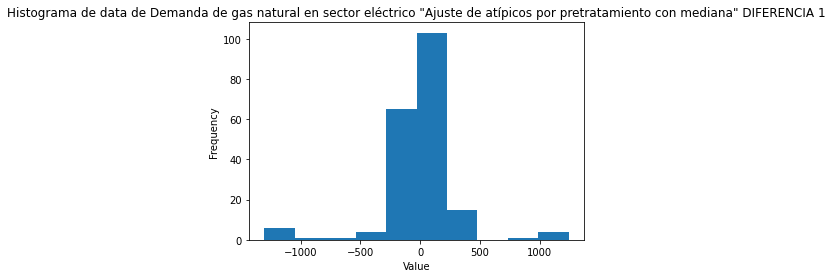

In [70]:
# Generate the histogram
plt.hist(demanda_electrico_train_tratamiento_mediana_diff1.dropna(), bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Ajuste de atípicos por pretratamiento con mediana" DIFERENCIA 1')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda electrico train data con pretratamiento de mediana Diferencia 1

In [71]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_train_tratamiento_mediana_diff1 = adfuller(demanda_electrico_train_tratamiento_mediana_diff1.dropna())


adf_test_demanda_electrico_train_tratamiento_mediana_diff1

(-6.512064952558792,
 1.0941482167975445e-08,
 11,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 2574.232899784069)

In [72]:
print(f"The ADF statistic value f is: {adf_test_demanda_electrico_train_tratamiento_mediana_diff1[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_train_tratamiento_mediana_diff1[1]}")

if adf_test_demanda_electrico_train_tratamiento_mediana_diff1[0] < adf_test_demanda_electrico_train_tratamiento_mediana_diff1[4]['5%']:
     print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de NO estacionariedad")


The ADF statistic value f is: -6.512064952558792
The ADF p value p is: 1.0941482167975445e-08
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de SI estacionariedad


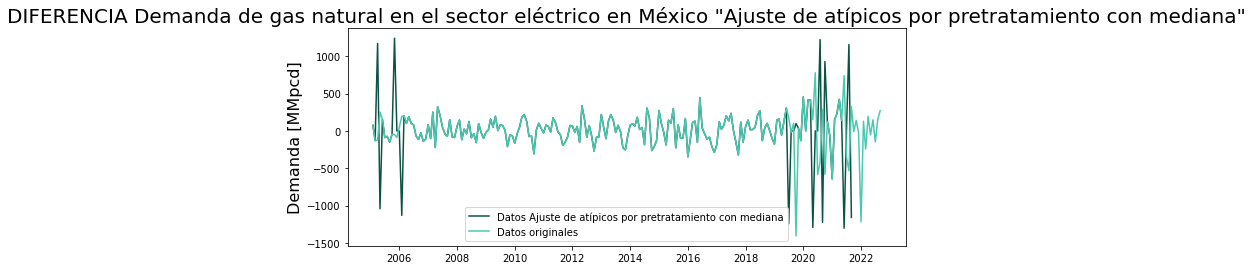

In [73]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_train_tratamiento_mediana_diff1, color='#0B5345')
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA Demanda de gas natural en el sector eléctrico en México "Ajuste de atípicos por pretratamiento con mediana"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)
plt.legend(['Datos Ajuste de atípicos por pretratamiento con mediana', 'Datos originales'], loc='lower center', fontsize=10)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento mediana"

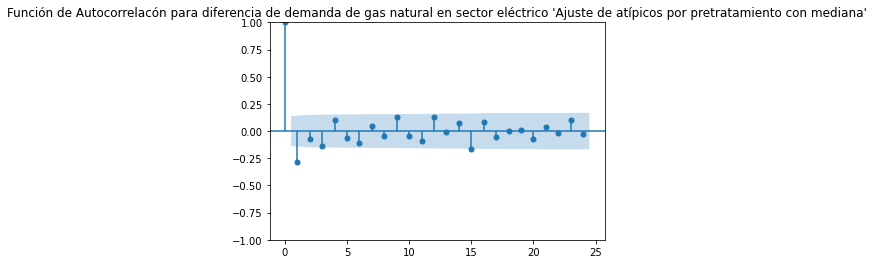

In [74]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_train_tratamiento_mediana_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector eléctrico 'Ajuste de atípicos por pretratamiento con mediana'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


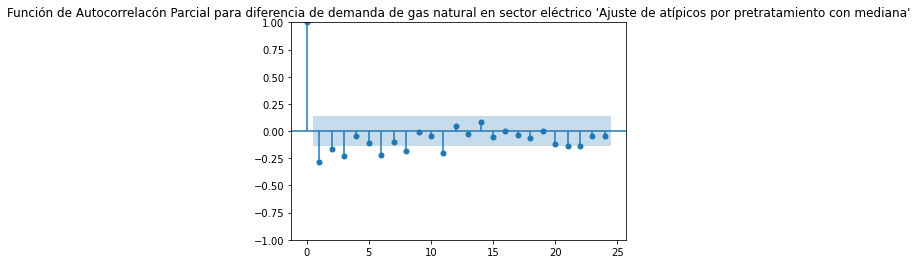

In [75]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_train_tratamiento_mediana_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector eléctrico 'Ajuste de atípicos por pretratamiento con mediana'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento media'

In [77]:
##Create the model
model_ARIMA_electrico_tratamiento_mediana = ARIMA (demanda_electrico_train_pretratamiento_mediana, order=(3,1,1))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento_mediana_fit = model_ARIMA_electrico_tratamiento_mediana.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento_mediana_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model fitting time 0.19664788246154785
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1417.741
Date:                Wed, 04 Oct 2023   AIC                           2845.483
Time:                        12:58:54   BIC                           2861.974
Sample:                    01-01-2005   HQIC                          2852.157
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3891      0.072      5.421      0.000       0.248       0.530
ar.L2          0.0397      0.057      0.702      0.483      -0.071       0.151
ar.L3        

In [78]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]

In [79]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento_mediana = model_ARIMA_electrico_tratamiento_mediana_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento_mediana)

2021-10-01    3339.624784
2021-11-01    3342.497383
2021-12-01    3466.452952
2022-01-01    3477.875154
2022-02-01    3486.981553
2022-03-01    3479.551807
2022-04-01    3475.969451
2022-05-01    3473.440596
2022-06-01    3472.999075
2022-07-01    3473.057011
2022-08-01    3473.295144
2022-09-01    3473.430819
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

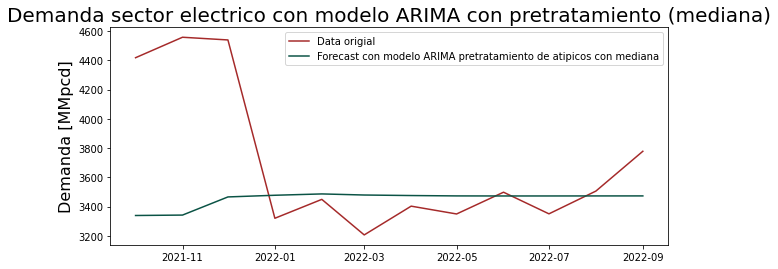

In [80]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_ARIMA_electrico_tratamiento_mediana,color='#0B5345')

plt.legend(('Data origial', 'Forecast con modelo ARIMA pretratamiento de atipicos con mediana'), fontsize=10)


plt.title('Demanda sector electrico con modelo ARIMA con pretratamiento (mediana)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento mediana

In [81]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento_mediana = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento_mediana)
RMSE_predictions_model_ARIMA_electrico_tratamiento_mediana = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento_mediana))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento_mediana)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento_mediana)

MAPE: 0.0901689908270974
RMSE: 578.6743217702743


Text(0, 0.5, 'Demanda [MMpcd]')

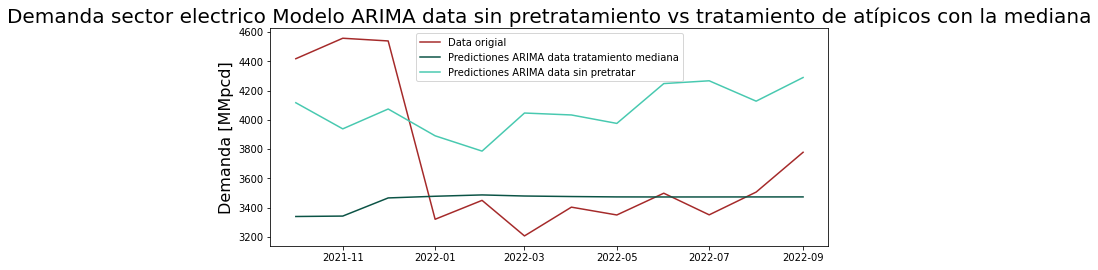

In [82]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_ARIMA_electrico_tratamiento_mediana, color='#0B5345')
plt.plot(predictions_model_ARIMA_electrico_original, color='#48C9B0')
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento mediana', 'Predictiones ARIMA data sin pretratar'), fontsize=10)

plt.title('Demanda sector electrico Modelo ARIMA data sin pretratamiento vs tratamiento de atípicos con la mediana', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Vamos a entrenar un segundo modelo SARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atipicos con tratamiento mediana'

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create the SARIMA model
model_SARIMA_electrico_tratamiento_mediana = SARIMAX(demanda_electrico_train_pretratamiento_mediana, order=(3, 1, 1), seasonal_order=(0, 1, 0, 12))

# Fit the SARIMA model
model_SARIMA_electrico_tratamiento_mediana_fit = model_SARIMA_electrico_tratamiento_mediana.fit()

# Print the summary of the model
print(model_SARIMA_electrico_tratamiento_mediana_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                        Demanded_Gas   No. Observations:                  201
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1361.009
Date:                             Wed, 04 Oct 2023   AIC                           2732.018
Time:                                     13:11:11   BIC                           2748.200
Sample:                                 01-01-2005   HQIC                          2738.575
                                      - 09-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4933      0.048     10.255      0.000       0.399       0.588
ar.L2          0.0429      

Se obtiene el forecas del model SARIMA electrico tratamiento mediana

In [84]:
##get the predictors and residuals 
predictions_model_SARIMA_electrico_tratamiento_mediana = model_SARIMA_electrico_tratamiento_mediana_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_SARIMA_electrico_tratamiento_mediana)

2021-10-01    3920.040946
2021-11-01    4077.635583
2021-12-01    4036.541825
2022-01-01    3399.248794
2022-02-01    3556.541453
2022-03-01    3783.829918
2022-04-01    4207.210693
2022-05-01    4346.175865
2022-06-01    3041.207332
2022-07-01    3041.165231
2022-08-01    4200.908767
2022-09-01    3041.143793
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

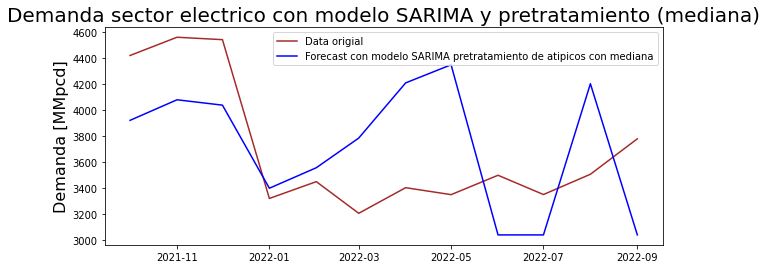

In [85]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_SARIMA_electrico_tratamiento_mediana, color='blue')

plt.legend(('Data origial', 'Forecast con modelo SARIMA pretratamiento de atipicos con mediana'))


plt.title('Demanda sector electrico con modelo SARIMA y pretratamiento (mediana)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_SARIMA_electrico_tratamiento_mediana

In [86]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_SARIMA_electrico_tratamiento_mediana = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_SARIMA_electrico_tratamiento_mediana)
RMSE_predictions_model_SARIMA_electrico_tratamiento_mediana = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_SARIMA_electrico_tratamiento_mediana))

print('MAPE:', MAPE_predictions_model_SARIMA_electrico_tratamiento_mediana)
print('RMSE:', RMSE_predictions_model_SARIMA_electrico_tratamiento_mediana)

MAPE: 0.14274375472181014
RMSE: 580.9294952263588


Text(0, 0.5, 'Demanda [MMpcd]')

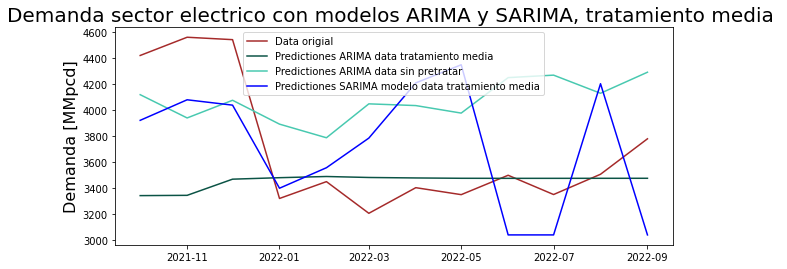

In [87]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='brown')
plt.plot(predictions_model_ARIMA_electrico_tratamiento_media, color='#0B5345')
plt.plot(predictions_model_ARIMA_electrico_original, color='#48C9B0')
plt.plot(predictions_model_SARIMA_electrico_tratamiento_mediana, color='blue')
plt.legend(('Data origial', 'Predictiones ARIMA data tratamiento mediana', 'Predictiones ARIMA data sin pretratar', 'Predictiones SARIMA modelo data tratamiento mediana'), fontsize=10)

plt.title('Demanda sector electrico con modelos ARIMA y SARIMA, tratamiento mediana ', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)